In [136]:
#Import Library
import os
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import randint

In [137]:
#import dataset
customers_info = pd.read_excel('/content/drive/MyDrive/DATA/MindX/MindX_Course4/customers (UK).xlsx',sheet_name='customer info')
items = pd.read_excel('/content/drive/MyDrive/DATA/MindX/MindX_Course4/customers (UK).xlsx',sheet_name='Items')
customer_trans = pd.read_excel('/content/drive/MyDrive/DATA/MindX/MindX_Course4/customers (UK).xlsx',sheet_name='Customer transactions')



#Traffic

In [138]:
dir = '/content/drive/MyDrive/DATA/MindX/MindX_Course4/Traffic/'
dir

'/content/drive/MyDrive/DATA/MindX/MindX_Course4/Traffic/'

In [139]:
files = os.listdir(dir)
files

['2020_06.xlsx',
 '2020_07.xlsx',
 '2020_08.xlsx',
 '2020_09.xlsx',
 '2020_10.xlsx',
 '2020_05.xlsx',
 '2020_02.xlsx',
 '2020_04.xlsx',
 '2020_03.xlsx',
 '2020_01.xlsx',
 '2020_11.xlsx',
 '2020_12.xlsx']

In [140]:
files_xls = [f for f in files if f[-4:] == 'xlsx']
files_xls

['2020_06.xlsx',
 '2020_07.xlsx',
 '2020_08.xlsx',
 '2020_09.xlsx',
 '2020_10.xlsx',
 '2020_05.xlsx',
 '2020_02.xlsx',
 '2020_04.xlsx',
 '2020_03.xlsx',
 '2020_01.xlsx',
 '2020_11.xlsx',
 '2020_12.xlsx']

In [141]:
traffic = pd.DataFrame()
for file in files_xls:
    tmp = pd.read_excel(dir + file,sheet_name=0)
    traffic = pd.concat([traffic, tmp], ignore_index=True)

In [142]:
# Split the Product name from Page URL
traffic['Product'] = range(len(traffic['Page URL']))
for i in range(len(traffic['Page URL'])):
    traffic['Product'][i] = traffic['Page URL'].iloc[i].split('/')[-1]

<ipython-input-142-30e1b92bde9f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic['Product'][i] = traffic['Page URL'].iloc[i].split('/')[-1]
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [143]:
traffic

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY),Product
0,/2020/6/100W-info0.465318075348137,141.6,145.0,154.2,Exa~e4sZi*|fpD<^,2020-06-09 15:50:21,100W-info0.465318075348137
1,/2020/6/101`ercar0.590103422236871,1343.6,1365.4,1455.4,McTFYulgCm[Eh=@o,2020-06-11 04:45:43,101`ercar0.590103422236871
2,/2020/6/101[-info0.42408081151318,749.4,769.4,830.8,T-/~?&8y.*/~e<c,2020-06-07 23:57:06,101[-info0.42408081151318
3,/2020/6/15-Gspace0.654891466977695,270.0,274.0,293.4,"Re|B]!\#7XqHP""=B",2020-06-07 15:27:00,15-Gspace0.654891466977695
4,/2020/6/18-`lease0.952310074301681,1061.8,1095.2,1268.0,#B_-`aDe`}CVt'!A,2020-06-09 17:55:17,18-`lease0.952310074301681
...,...,...,...,...,...,...,...
17884,/2020/12/yinfbowls0.6558670149224,130.0,133.2,142.2,HoXbja)_x007f_qT:ESE8#,2020-12-01 04:55:35,yinfbowls0.6558670149224
17885,/2020/12/yosolease0.0455049365834417,314.6,325.6,365.2,"YoRQW7@*&5W+~4Y""",2020-12-03 15:25:00,yosolease0.0455049365834417
17886,/2020/12/you^-info0.127669879156147,1419.6,1448.4,1615.8,"MouDd/fn,XEARhBp",2020-12-06 23:57:54,you^-info0.127669879156147
17887,/2020/12/youe-info0.729842478879044,483.8,487.6,509.6,"yo4}AUKGso=,?!DX",2020-12-04 05:59:22,youe-info0.729842478879044


In [144]:
traffic.sort_values('Posted On (DD/MM/YYYY)', ascending=True, inplace=True, ignore_index=True)

#Customer Info

In [145]:
customers_info.head()

,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
0,0.0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N
1,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2015-12-21,M,2009-10-06,Y
2,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,2015-12-22,F,1990-08-04,Y
3,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,2015-12-22,M,1974-07-24,N
4,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,2015-12-22,M,1981-08-13,N


In [146]:
customers_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          770 non-null    float64       
 1   FirstName   770 non-null    object        
 2   LastName    770 non-null    object        
 3   Country     770 non-null    object        
 4   DateJoined  770 non-null    datetime64[ns]
 5   Gender      519 non-null    object        
 6   Birthday    770 non-null    datetime64[ns]
 7   Newsletter  770 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 48.2+ KB


In [147]:
#Check Null values
customers_info.isnull().sum()

ID              0
FirstName       0
LastName        0
Country         0
DateJoined      0
Gender        251
Birthday        0
Newsletter      0
dtype: int64

In [148]:
#Replace null values
customers_info['Gender'] = customers_info['Gender'].replace(np.nan,'O')

In [149]:
customers_info.isnull().sum()

ID            0
FirstName     0
LastName      0
Country       0
DateJoined    0
Gender        0
Birthday      0
Newsletter    0
dtype: int64

In [150]:
#Check unique values of Country column
print(customers_info['Country'].unique())

['FR - France' 'GER - Germany' 'UK - United Kingdom' 'IT - Italy']


#Items

In [151]:
items.head()

,ItemID,Product,Brand,SellPrice,CostPrice
0,1.0,032irview0.686128260621012,"Ki)D3jDmA,RIP68X",943.0,359.0
1,2.0,070ttream0.518887735674677,GO4582ey<S!+k1VE,717.0,207.0
2,3.0,070htream0.333307794468401,G.Kb^jz*soY!(-4Q,739.0,199.0
3,4.0,100Grseys0.271522111052549,Dr|vm[-5p~56Y\mk,532.0,262.0
4,5.0,100[nside0.645837365801341,Dr|vm[-5p~56Y\mk,593.0,392.0


In [152]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17889 entries, 0 to 17888
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ItemID     17889 non-null  float64
 1   Product    17889 non-null  object 
 2   Brand      17889 non-null  object 
 3   SellPrice  17889 non-null  float64
 4   CostPrice  17889 non-null  float64
dtypes: float64(3), object(2)
memory usage: 698.9+ KB


In [153]:
items.isnull().sum()

ItemID       0
Product      0
Brand        0
SellPrice    0
CostPrice    0
dtype: int64

#Customer Transactions

In [154]:
customer_trans.head()

,OrderID,CustomerID,ItemID,TransactionDate,Channel
0,0.0,0.0,352.0,2020-03-21,In Store
1,0.0,0.0,3433.0,2020-07-14,In Store
2,0.0,0.0,11162.0,2020-08-09,In Store
3,0.0,0.0,13011.0,2020-12-07,In Store
4,0.0,0.0,13885.0,2020-11-08,In Store


In [155]:
customer_trans.isnull().sum()

OrderID            0
CustomerID         0
ItemID             0
TransactionDate    0
Channel            0
dtype: int64

In [156]:
customer_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25213 entries, 0 to 25212
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          25213 non-null  float64       
 1   CustomerID       25213 non-null  float64       
 2   ItemID           25213 non-null  float64       
 3   TransactionDate  25213 non-null  datetime64[ns]
 4   Channel          25213 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 985.0+ KB


#Merge data

In [157]:
#merge data - Merge all data (transactions,items,customer info)

data = customer_trans.merge(customers_info,how='inner', left_on='CustomerID', right_on='ID').\
                    merge(items,how='inner',left_on='ItemID', right_on='ItemID')


In [158]:
data.head()

,OrderID,CustomerID,ItemID,TransactionDate,Channel,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter,Product,Brand,SellPrice,CostPrice
0,0.0,0.0,352.0,2020-03-21,In Store,0.0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,O,1968-02-03,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735.0,426.0
1,637.0,57.0,352.0,2020-03-15,In Store,57.0,Var0.0876970591979241,Bhan0.0592432181453122,GER - Germany,2016-02-02,F,1966-01-14,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735.0,426.0
2,0.0,0.0,3433.0,2020-07-14,In Store,0.0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,O,1968-02-03,N,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963.0,491.0
3,1840.0,167.0,3433.0,2020-05-16,In Store,167.0,Y0.694526245425698,Pur0.889218979929135,UK - United Kingdom,2015-04-16,M,1972-03-23,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963.0,491.0
4,3386.0,307.0,3433.0,2020-04-23,In Store,307.0,Moh0.478682882191102,Khair0.475794987205303,FR - France,2016-06-02,O,1989-05-04,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963.0,491.0


In [159]:
#We need to drop 1 column customerID or ID, because it's duplicated columns

data.drop('ID', inplace=True, axis=1)

In [160]:
data.head()

,OrderID,CustomerID,ItemID,TransactionDate,Channel,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter,Product,Brand,SellPrice,CostPrice
0,0.0,0.0,352.0,2020-03-21,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,O,1968-02-03,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735.0,426.0
1,637.0,57.0,352.0,2020-03-15,In Store,Var0.0876970591979241,Bhan0.0592432181453122,GER - Germany,2016-02-02,F,1966-01-14,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735.0,426.0
2,0.0,0.0,3433.0,2020-07-14,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,O,1968-02-03,N,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963.0,491.0
3,1840.0,167.0,3433.0,2020-05-16,In Store,Y0.694526245425698,Pur0.889218979929135,UK - United Kingdom,2015-04-16,M,1972-03-23,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963.0,491.0
4,3386.0,307.0,3433.0,2020-04-23,In Store,Moh0.478682882191102,Khair0.475794987205303,FR - France,2016-06-02,O,1989-05-04,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963.0,491.0


#**What is the impact of our website traffic on revenue?**


##Finding the trending of traffic by Date

Text(0, 0.5, 'Number of Page View')

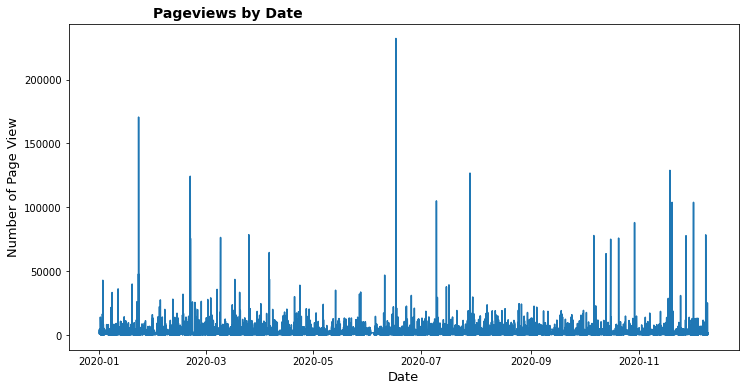

In [161]:
#Draw traffic chart to see the trending.
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(traffic['Posted On (DD/MM/YYYY)'],traffic['pageviews'])

# Add title and axes names

plt.title('Pageviews by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Date',size = 13)
plt.ylabel('Number of Page View',size = 13)

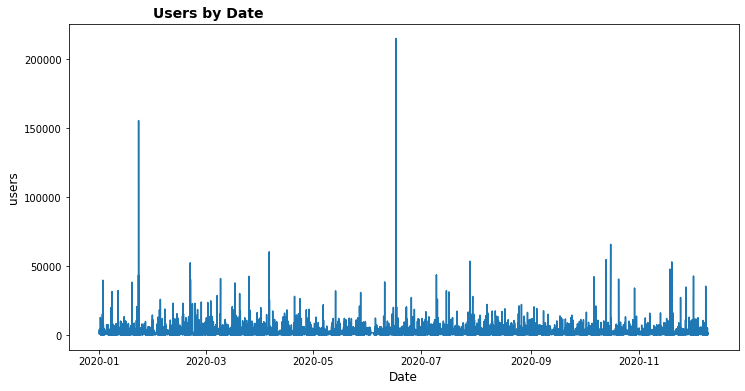

In [162]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(traffic['Posted On (DD/MM/YYYY)'],traffic['users'],)


# thêm title, label các trục và source:
plt.title('Users by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Date', size=12)
plt.ylabel('users', size=12)

plt.show()

--> We can see that there is no trending line here of traffic. There are some day where the stat of user or views increased drammatically, one of main reasons for that is probabbly the holiday of UK, or special shopping day ...

## Compare the number of orders, items and revenue between 2 channels: In Store and Online

In [163]:
summary_trans = data.groupby(["TransactionDate","Channel"]).\
                            agg(total_orders = ('OrderID','nunique'),total_items = ('ItemID','size'), total_revenue = ('SellPrice','sum')).\
                            reset_index()

In [164]:
summary_trans

,TransactionDate,Channel,total_orders,total_items,total_revenue
0,2020-01-01,In Store,30,30,23820.0
1,2020-01-01,Online,35,36,32044.0
2,2020-01-02,In Store,33,33,24069.0
3,2020-01-02,Online,40,40,31612.0
4,2020-01-03,In Store,46,46,37118.0
...,...,...,...,...,...
643,2020-12-25,Online,43,43,31365.0
644,2020-12-26,In Store,28,28,23072.0
645,2020-12-26,Online,39,41,33473.0
646,2020-12-27,In Store,45,45,37629.0


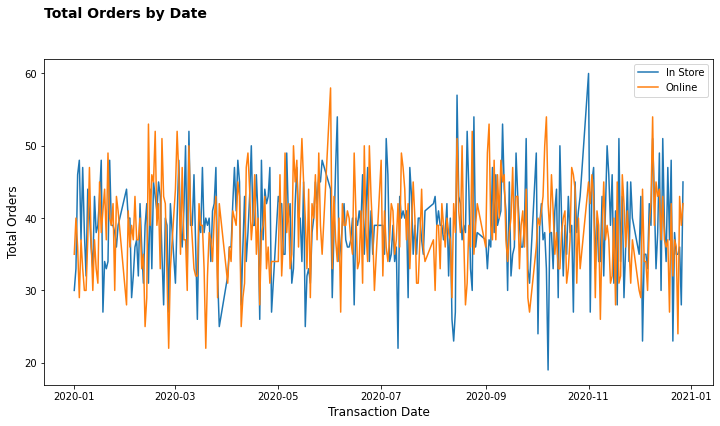

In [165]:
#Draw graph relating to Total Order by Date between In-Store & Online
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(summary_trans[summary_trans["Channel"] == "In Store"].TransactionDate,\
        summary_trans[summary_trans["Channel"] == "In Store"].total_orders, \
       label="In Store")

ax.plot(summary_trans[summary_trans["Channel"] == "Online"].TransactionDate,\
        summary_trans[summary_trans["Channel"] == "Online"].total_orders, \
       label="Online")

plt.legend()
# Add title and name for axes
plt.suptitle('Total Orders by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Transaction Date', size=12)
plt.ylabel('Total Orders', size=12)

plt.show()

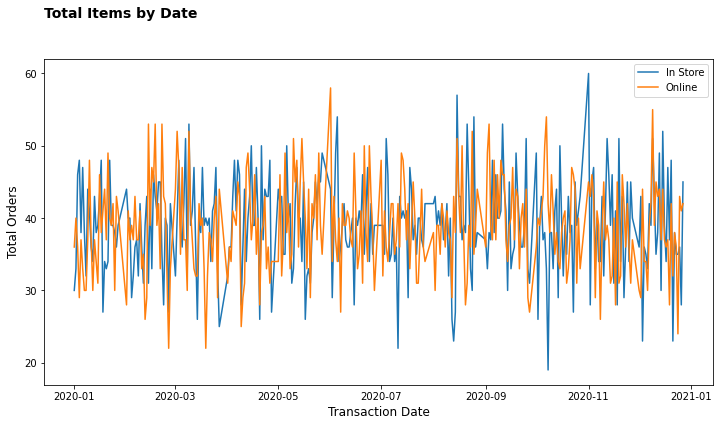

In [166]:
#Draw graph relating to Total Item by Date between In-Store & Online
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(summary_trans[summary_trans["Channel"] == "In Store"].TransactionDate,\
        summary_trans[summary_trans["Channel"] == "In Store"].total_items, \
       label="In Store")

ax.plot(summary_trans[summary_trans["Channel"] == "Online"].TransactionDate,\
        summary_trans[summary_trans["Channel"] == "Online"].total_items, \
       label="Online")

plt.legend()
# Add title and name for axes
plt.suptitle('Total Items by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Transaction Date', size=12)
plt.ylabel('Total Orders', size=12)

plt.show()

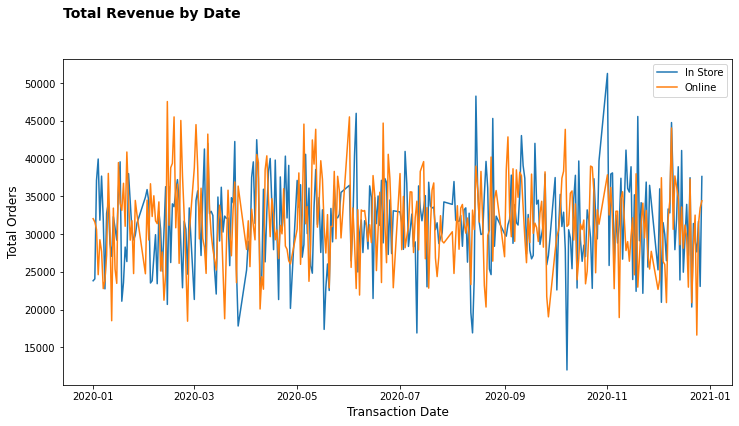

In [167]:
#Draw graph relating to Total Revenue by Date between In-Store & Online
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(summary_trans[summary_trans["Channel"] == "In Store"].TransactionDate,\
        summary_trans[summary_trans["Channel"] == "In Store"].total_revenue, \
       label="In Store")

ax.plot(summary_trans[summary_trans["Channel"] == "Online"].TransactionDate,\
        summary_trans[summary_trans["Channel"] == "Online"].total_revenue, \
       label="Online")

plt.legend()
# Add title and name for axes
plt.suptitle('Total Revenue by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Transaction Date', size=12)
plt.ylabel('Total Orders', size=12)

plt.show()

There is no much different between In-Store & Online in terms of Revenue, Total Orders, Total items. 

##Traffic vs Revenue

In [168]:
#Create table of Revenue by date 

revenue = data.groupby(["TransactionDate"]).agg( total_revenue = ('SellPrice','sum')).reset_index()
revenue

,TransactionDate,total_revenue
0,2020-01-01,55864.0
1,2020-01-02,55681.0
2,2020-01-03,67753.0
3,2020-01-04,64573.0
4,2020-01-05,61098.0
...,...,...
319,2020-12-23,61634.0
320,2020-12-24,44266.0
321,2020-12-25,63062.0
322,2020-12-26,56545.0


In [169]:
#Create new column Date of Traffic table
from datetime import datetime as dt

traffic['Date'] = traffic['Posted On (DD/MM/YYYY)'].dt.date
traffic['Date'] = pd.to_datetime(traffic['Date'])

traffic.head()

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY),Product,Date
0,/2020/1/vanBip-on0.100834672919284,1034.8,1048.4,1134.4,"Vag9""-Z=gN30ND@[",2020-01-01 01:03:02,vanBip-on0.100834672919284,2020-01-01
1,/2020/1/fujBdence0.385183712192661,4097.8,4142.6,4457.2,ToOYo&o|?(;MH>V:,2020-01-01 01:46:40,fujBdence0.385183712192661,2020-01-01
2,/2020/1/baiXpsule0.236876019278184,642.6,653.8,726.8,PaasB'\_LlDEk`=W,2020-01-01 02:55:07,baiXpsule0.236876019278184,2020-01-01
3,/2020/1/artjriner0.183950395687591,3413.0,3469.6,3795.6,Ro7|R40![FY$PS`<,2020-01-01 04:18:00,artjriner0.183950395687591,2020-01-01
4,/2020/1/appMn-usd0.284138838758011,1447.0,1465.6,1562.6,MiUNo1$pZkrlcw>M,2020-01-01 04:35:14,appMn-usd0.284138838758011,2020-01-01


In [170]:
#Summary traffic table- users, uniquePageviews,pageviews

summary_traffic = traffic.groupby(['Date']).\
                            agg(total_user = ('users','sum'), total_unique_pageview = ('uniquePageviews', 'sum'), total_pageview = ('pageviews','sum')).\
                            reset_index()
summary_traffic             

,Date,total_user,total_unique_pageview,total_pageview
0,2020-01-01,63755.4,64814.8,70353.6
1,2020-01-02,111861.4,113640.0,122557.8
2,2020-01-03,63749.8,65175.4,71058.0
3,2020-01-04,13946.0,14274.6,15349.6
4,2020-01-05,47065.0,47856.6,51438.2
...,...,...,...,...
338,2020-12-05,23906.0,24678.8,27024.6
339,2020-12-06,25892.8,26517.0,28433.4
340,2020-12-07,95081.8,97565.0,105456.0
341,2020-12-08,100577.0,105419.6,150902.2


In [171]:
#Merge summary_traffic & revenue 

revenue_x_traffic = revenue.merge(summary_traffic,how='inner',left_on='TransactionDate', right_on='Date')

revenue_x_traffic

,TransactionDate,total_revenue,Date,total_user,total_unique_pageview,total_pageview
0,2020-01-01,55864.0,2020-01-01,63755.4,64814.8,70353.6
1,2020-01-02,55681.0,2020-01-02,111861.4,113640.0,122557.8
2,2020-01-03,67753.0,2020-01-03,63749.8,65175.4,71058.0
3,2020-01-04,64573.0,2020-01-04,13946.0,14274.6,15349.6
4,2020-01-05,61098.0,2020-01-05,47065.0,47856.6,51438.2
...,...,...,...,...,...,...
300,2020-12-05,55953.0,2020-12-05,23906.0,24678.8,27024.6
301,2020-12-06,47406.0,2020-12-06,25892.8,26517.0,28433.4
302,2020-12-07,65365.0,2020-12-07,95081.8,97565.0,105456.0
303,2020-12-08,67222.0,2020-12-08,100577.0,105419.6,150902.2


In [172]:
revenue_x_traffic.drop('Date', axis=1, inplace=True)

In [173]:
revenue_x_traffic

,TransactionDate,total_revenue,total_user,total_unique_pageview,total_pageview
0,2020-01-01,55864.0,63755.4,64814.8,70353.6
1,2020-01-02,55681.0,111861.4,113640.0,122557.8
2,2020-01-03,67753.0,63749.8,65175.4,71058.0
3,2020-01-04,64573.0,13946.0,14274.6,15349.6
4,2020-01-05,61098.0,47065.0,47856.6,51438.2
...,...,...,...,...,...
300,2020-12-05,55953.0,23906.0,24678.8,27024.6
301,2020-12-06,47406.0,25892.8,26517.0,28433.4
302,2020-12-07,65365.0,95081.8,97565.0,105456.0
303,2020-12-08,67222.0,100577.0,105419.6,150902.2


In [174]:
revenue_x_traffic.corr()

,total_revenue,total_user,total_unique_pageview,total_pageview
total_revenue,1.000000,0.076276,0.075581,0.075464
total_user,0.076276,1.000000,0.999364,0.978222
total_unique_pageview,0.075581,0.999364,1.000000,0.981307
total_pageview,0.075464,0.978222,0.981307,1.000000


The correlation between features are weak, so we can conclude that the traffic has no impact on the revenue. 

#**2.Which products get us pageviews and revenue?**


##Top 10 product get the highest number of Pageviews 


In [175]:
product_pageviews = traffic.groupby(['Product']).agg(total_pageviews =('users','sum')).reset_index()


In [176]:
product_pageviews.sort_values('total_pageviews', ascending=False, inplace=True, ignore_index=True)

In [177]:
product_pageviews.head(10)

,Product,total_pageviews
0,sonEies-x0.139039192479287,215222.6
1,porQlease0.507911745358356,155640.0
2,tobH-info0.428382841646979,65819.4
3,ninI-info0.46275630306324,60351.8
4,crow-home0.0127810060365789,54677.8
5,besfeek-50.280274313298435,53508.2
6,nobHlease0.20690948418157,53041.2
7,rogLrecap0.644396392507623,52381.2
8,pumMvideo0.837931992780922,47779.6
9,jefXaunch0.410067394635876,43667.4


##Top 10 product get the lowest number of Pageviews 


In [178]:
product_pageviews.tail(10)

,Product,total_pageviews
17879,maju-date0.799046146817876,2.0
17880,a-cClease0.167928605630817,1.6
17881,undjcline0.806504582435603,1.4
17882,facQ-rise0.00977738420521201,0.8
17883,tisetream0.262717438134904,0.4
17884,sylEemand0.214265914271909,0.4
17885,ariDcle-20.188973495512866,0.2
17886,bobK-news0.573637665518942,0.2
17887,recPeator0.470956776867346,0.2
17888,yunsement0.44148099082229,0.2


##Top 10 product get the highest revenue 


In [179]:
product_revenue = data.groupby(["Product"]).agg( total_revenue = ('SellPrice','sum')).reset_index()


In [180]:
product_revenue.sort_values('total_revenue', ascending=False, inplace=True, ignore_index=True)

In [181]:
product_revenue.head(10)

,Product,total_revenue
0,hypsrview0.321288570724117,11556.0
1,reeelease0.452821711209563,9205.0
2,audE-info0.884915261087885,8428.0
3,kinv-news0.29905739542661,7980.0
4,ymc_orson0.319251813809483,7794.0
5,bmwk-20210.31690704020655,7686.0
6,ubeYanada0.100113795307302,7552.0
7,titM-info0.550757203954225,7520.0
8,samLement0.78565851365938,7518.0
9,dioa-info0.750756927974235,7422.0


##Top 10 product get the lowest revenue 


In [182]:
product_revenue.tail(10)

,Product,total_revenue
13532,teertream0.435511384141963,81.0
13533,polWkbook0.608294655546041,81.0
13534,secD-info0.408433946152434,78.0
13535,canuement0.946238211030094,77.0
13536,tenHx-toy0.234647410327591,74.0
13537,2g-aation0.859210237517232,72.0
13538,g-hxrowns0.35584537222102,69.0
13539,legX-info0.422268138697415,63.0
13540,umaZction0.0701712715774042,60.0
13541,wacNkbook0.849290713312118,46.0


#**3.What customer segments are there?**


In [183]:
customer_data = data.groupby(["CustomerID","FirstName", "LastName","Country","Birthday","DateJoined","Newsletter","Gender"]).\
                            agg(total_expenditures = ('SellPrice','sum')).\
                            reset_index()

In [184]:
customer_data

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,Gender,total_expenditures
0,0.0,V0.296680287495188,L0.104646531512644,FR - France,1968-02-03,2015-12-18,N,O,32997.0
1,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,M,34948.0
2,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,F,17879.0
3,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,M,14603.0
4,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,M,37029.0
...,...,...,...,...,...,...,...,...,...
765,765.0,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,1989-10-25,2016-09-05,N,F,29538.0
766,766.0,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,1965-07-25,2016-09-05,Y,O,5331.0
767,767.0,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,1980-11-07,2016-09-05,Y,M,45470.0
768,768.0,Y0.286774649994125,Aung0.752567424443609,GER - Germany,1980-09-17,2016-09-05,Y,M,35462.0


In [185]:
from datetime import date

today = date.today()

# Age
customer_data['Age'] = range(len(customer_data['Birthday']))
for i in range(len(customer_data['Birthday'])):
    customer_data['Age'][i] = 2020 - customer_data['Birthday'][i].year

# Loyalty
customer_data['Loyalty'] = range(len(customer_data['DateJoined']))
for i in range(len(customer_data['DateJoined'])):
    customer_data['Loyalty'][i] = 2020 - customer_data['DateJoined'][i].year

<ipython-input-185-b643e0383d2a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Age'][i] = 2020 - customer_data['Birthday'][i].year
<ipython-input-185-b643e0383d2a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Loyalty'][i] = 2020 - customer_data['DateJoined'][i].year


In [186]:
customer_data

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,Gender,total_expenditures,Age,Loyalty
0,0.0,V0.296680287495188,L0.104646531512644,FR - France,1968-02-03,2015-12-18,N,O,32997.0,52,5
1,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,M,34948.0,11,5
2,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,F,17879.0,30,5
3,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,M,14603.0,46,5
4,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,M,37029.0,39,5
...,...,...,...,...,...,...,...,...,...,...,...
765,765.0,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,1989-10-25,2016-09-05,N,F,29538.0,31,4
766,766.0,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,1965-07-25,2016-09-05,Y,O,5331.0,55,4
767,767.0,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,1980-11-07,2016-09-05,Y,M,45470.0,40,4
768,768.0,Y0.286774649994125,Aung0.752567424443609,GER - Germany,1980-09-17,2016-09-05,Y,M,35462.0,40,4


In [187]:
customer_data.nunique()

CustomerID            770
FirstName             638
LastName              491
Country                 4
Birthday              761
DateJoined            172
Newsletter              2
Gender                  3
total_expenditures    763
Age                    46
Loyalty                 2
dtype: int64

###Create Model

In [196]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [231]:
dataset = customer_data[["Age","total_expenditures"]].copy()
dataset

,Age,total_expenditures
0,52,32997.0
1,11,34948.0
2,30,17879.0
3,46,14603.0
4,39,37029.0
...,...,...
765,31,29538.0
766,55,5331.0
767,40,45470.0
768,40,35462.0


In [210]:
# encoder = preprocessing.LabelEncoder()
# dataset['Gender'] = encoder.fit_transform(dataset['Gender'])


In [232]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset)

In [233]:
scaled_features

array([[ 1.54469474,  0.47966238],
       [-1.60271799,  0.62405401],
       [-0.14416087, -0.63920625],
       ...,
       [ 0.62350077,  1.4027771 ],
       [ 0.62350077,  0.66209465],
       [-0.14416087, -0.1441598 ]])

In [235]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

In [236]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

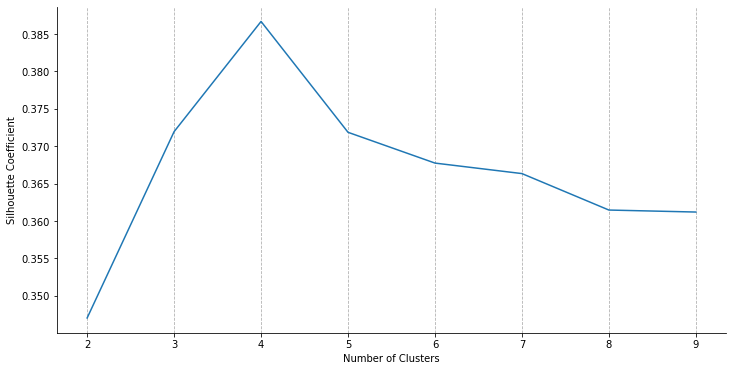

In [238]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(range(2, 10), silhouette_coefficients)

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
    
ax.xaxis.grid(linestyle='dashed')
plt.xticks(range(2, 10))

plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

We can see that The value of Sihouette score is highest with k =4 , so we choose 4 clusters group

In [239]:
kmeans = KMeans(n_clusters=4,**kmeans_kwargs)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=4, random_state=42)

In [240]:
dataset['Cluster_Labels'] = kmeans.labels_

In [241]:
dataset

,Age,total_expenditures,Cluster_Labels
0,52,32997.0,3
1,11,34948.0,2
2,30,17879.0,1
3,46,14603.0,0
4,39,37029.0,3
...,...,...,...
765,31,29538.0,2
766,55,5331.0,0
767,40,45470.0,3
768,40,35462.0,3


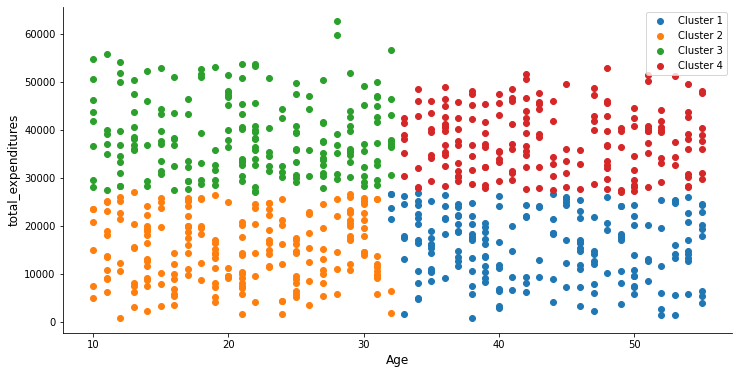

In [242]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(dataset[dataset['Cluster_Labels']==0].Age, dataset[dataset['Cluster_Labels']==0].total_expenditures, label = 'Cluster 1')
ax.scatter(dataset[dataset['Cluster_Labels']==1].Age, dataset[dataset['Cluster_Labels']==1].total_expenditures, label = 'Cluster 2')
ax.scatter(dataset[dataset['Cluster_Labels']==2].Age, dataset[dataset['Cluster_Labels']==2].total_expenditures, label = 'Cluster 3')
ax.scatter(dataset[dataset['Cluster_Labels']==3].Age, dataset[dataset['Cluster_Labels']==3].total_expenditures, label = 'Cluster 4')

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
plt.xlabel('Age', size=12)
plt.ylabel('total_expenditures', size=12)
plt.legend()
plt.show()


**Conclusion:** There are 4 customer segmentation.
 + Customers below 35 years old, Total expenditure is below 30000
 + Customers below 35 years old, Total expenditure is over 30000
 + Customers are over 35 years old, Total expenditure is below 30000
 + Customers are over 35 years old, Total expenditure is over 30000